# 12.2. Simulating an elementary cellular automaton

In [41]:
import numpy as np
import matplotlib
import random
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

#some code from https://github.com/ipython-books/cookbook-2nd-code

# Print some velocity averages

In [42]:
# N = 1000
# L = 1000
# its = 1000
# eta_range = [2.0, 0.2, 0.02, 0.002, 0.0002]

# for eta in eta_range:
#     p = (N/L)
#     x = generate2(L, its, eta, p)
#     avg_velocity = []

#     for gen in x:
#         velocities = []
#         for vel in gen:  # only count the non-zero velocities
#             if vel != 0:
#                 velocities.append(vel)
#         avg_velocity.append(sum(velocities)/len(velocities))
#     plt.plot(avg_velocity, label=eta)

# plt.legend()
# plt.show()

## Particle density plot

In [43]:
def U(x_row, pos):
    neighbours = []
     
    # two nearest neighbours total 
    if pos == 0:
        neighbours_pos = [1, -1, pos]
    elif pos == len(x_row)-1:
        neighbours_pos = [0, -2, pos]
    else:
        neighbours_pos = [pos-1, pos, pos+1]  
    
    maj_velocity = 0
    for n in neighbours_pos:
        pos_list = x_row[n]
        for idx in range(len(pos_list)):
            maj_velocity += x_row[n][idx] # getting the velocity of every bird that is locates at this position
    
    if maj_velocity > 0:
        velocity_avg = +1
    elif maj_velocity < 0:
        velocity_avg = -1
    else:
        velocity_avg = 0
    
    return velocity_avg

def flock_step(x_row, eta, size):
    new_row = [ [] for _ in range(size) ]

    for pos, birds in enumerate(x_row):
        for bird in (birds):
            #chosen particle
            x_mu = pos  # location of bird
            v_mu = bird   # velocity of bird

            U_x = U(x_row, pos)

            W_u = (1-(1-2*eta)*v_mu*U_x)/2
            if v_mu == 0:
                continue

            if (random.random() < W_u):
                # We flip direction of bird
                if v_mu == -1:
                    vel_to_insert = 1
                    pos_to_insert = x_mu + vel_to_insert

                    # make sure we keep bounds in mind, insert in the beginning
                    if pos_to_insert > (len(x_row)-1):
                        pos_to_insert = 0
                else: # v_mu is 1
                    vel_to_insert = -1
                    pos_to_insert = x_mu + vel_to_insert
                
                new_row[pos_to_insert].append(vel_to_insert)
                
            else:
                # We do not flip, keep original velocity. But we do move the bird
                vel_to_insert = v_mu
                if (pos == (len(x_row)-1)) & (v_mu == 1): # move from right bound to left bound
                    pos_to_insert = 0
                else:
                    pos_to_insert = x_mu + v_mu
                
                new_row[pos_to_insert].append(vel_to_insert)
    
    return new_row


def generate_1d(size, steps, eta, p):
    x = [ [ [] for _ in range(size) ] for _ in range(steps) ]
    
    velocities  = np.random.choice([-1, 0, 1], size=size, p=[p/2, 1-p, p/2])
    velocities = velocities.tolist()

    for idx, v in enumerate(velocities):
        x[0][idx] = [v]
    
    for i in range(steps - 1):
        x[i + 1] = flock_step(x[i], eta, size)
        
    return x

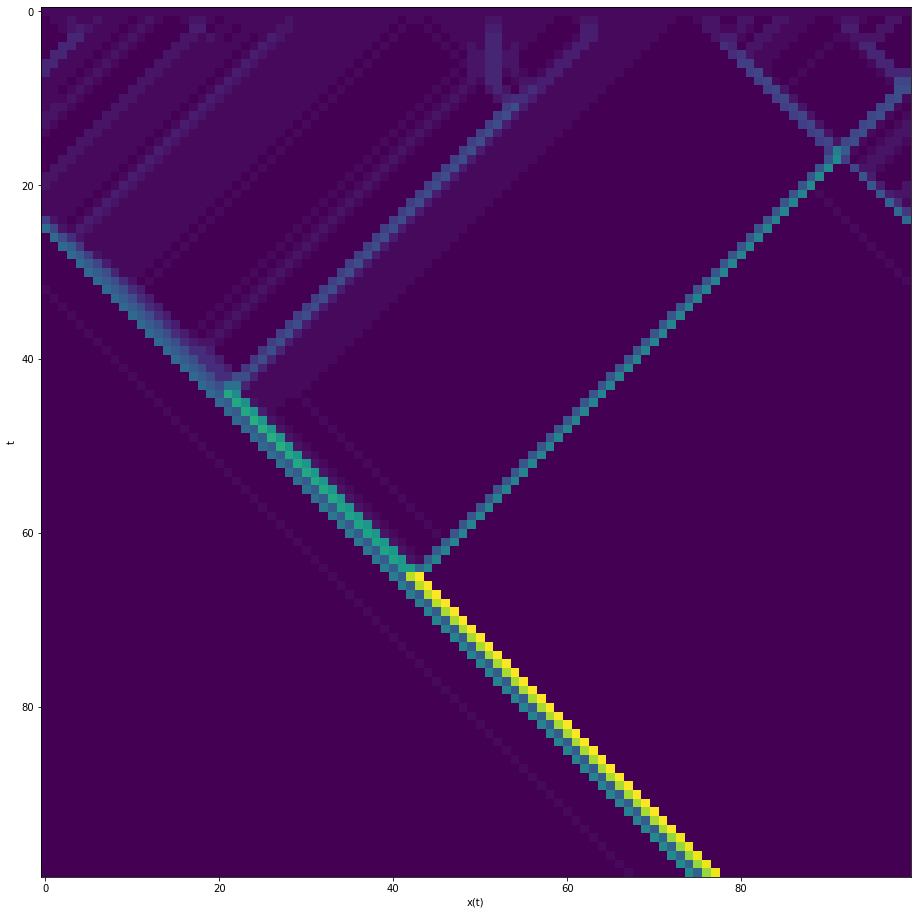

In [44]:
N = 100
L = 100
its = 100
eta = 0.001
p = (N/L)
x = generate_1d(L, its, eta, p)


def get_density_values(x):
    list_of_density = []
    for gens in x:
        density_row = []
        for pos in gens:
            density_row.append(len(pos))
        list_of_density.append(density_row)
    return list_of_density


density_x = get_density_values(x)

plt.figure(figsize=(20, 16))
plt.ylabel('t')
plt.xlabel('x(t)')
plt.imshow(density_x, interpolation='none')

## to do
- bifurcation plot
- logistic map
- variance in particle density

In [45]:
print('one row of 1d plot', x[20])

one row of 1d plot [[-1, -1], [-1], [-1], [-1], [-1], [-1], [-1], [], [-1], [-1, -1, -1], [-1, -1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [], [-1], [], [], [], [], [], [], [], [], [], [], [-1], [], [-1], [-1, -1], [-1], [], [], [], [], [], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [], [], [], [], [], [], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1], [], [], [-1, -1]]


## 2D implementation

In [46]:
def get_2d_neighbours(gen, pos):
    row_neighbours = []
    column_neighbours = []
    
    #pos[0] is the row, pos[1] the column
    
    # the column value for this equals pos[0], only different row
    if pos[0] == 0:
        row_neighbours = [1, -1, 0]
    elif pos[0] == len(gen)-1:
        row_neighbours = [0, -2, -1]
    else:
        row_neighbours = [pos[0]-1, pos[0], pos[0]+1]
        
    
    # the row value for this equals the same, we skip the count of our own cell as we already count that in the above
    if pos[1] == 0:
        column_neigbours = [1, -1]
    elif pos[1] == len(gen[0])-1:
        column_neighbours = [0, -2]
    else: 
        column_neighbours = [pos[1]-1, pos[1]+1]
        
    
    neighbour_particles = []
    for r in row_neighbours:
        neighbour_particles.append(gen[r][pos[1]])
    
    for c in column_neighbours:
        neighbour_particles.append(gen[pos[0]][c])
        
#     print('neighbours', neighbour_particles)
    return neighbour_particles


def U_2d(gen, pos, particle):
    neighbour_particles = get_2d_neighbours(gen, pos)
    neighbour_particles_flat = [x for xs in neighbour_particles for x in xs]
    
#     print(neighbour_particles_flat)
    counter = Counter(neighbour_particles_flat).most_common(2)
    
    if len(counter) == 1:
        dominant_direction = counter[0][0]
        return dominant_direction 
    
    count1 = counter[0][1]
    count2 = counter[1][1]
    
    if count1 != count2: # We have a majority of 1 direction. 
        dominant_direction = counter[0][0]
        return dominant_direction
    else:
        return particle

    
def direction_change(direction, row_no, column_no, gen_length, row_length): 
    if direction == 'u':
        new_row = row_no-1     
        new_co = (new_row, column_no)
        
    elif direction == 'd':
        new_row = row_no+1 
        if new_row > (gen_length-1):
            new_row = 0
        new_co = (new_row, column_no)
        
    elif direction == 'l':
        new_col = column_no - 1
        new_co = (row_no, new_col)
        
    else:      #direction == 'r':
        new_col = column_no - 1
        if new_col > (row_length-1):
            new_col = 0
        new_co = (row_no, new_col)
        
    return new_co
        

def flock_step_2d(gen, eta, size):
    new_gen = [ [ [] for _ in range(size) ] for _ in range(size) ]

    for row_number, particle_row in enumerate(gen):
        for column_number, particle_pos in enumerate(particle_row):
            for particle in particle_pos:
                #chosen particle
                x_mu = (row_number, column_number)  # location of particle
                v_mu = particle   # velocity of particle
                
                U_x = U_2d(gen, x_mu, particle)
                
                # Transform direction strings to integers
                if v_mu == 'u':
                    v_trans = -1
                elif v_mu == 'd':
                    v_trans = 1
                elif v_mu == 'l':
                    v_trans = -1
                elif v_mu == 'r':
                    v_trans = 1
                else:
                    v_trans =0 
                
                numerical_direction = 0
                
                if U_x == 'u':
                    numerical_direction = -1
                    
                elif U_x == 'd':
                    numerical_direction = +1
                
                elif U_x == 'r':
                    numerical_direction = +1
                    
                elif U_x == 'l':
                    numerical_direction = -1
                    
                elif U_x == "c":
                    numerical_direction = 0
                    continue
                    
                W_u = (1-(1-2*eta)*v_trans*numerical_direction)/4  # Divide by 4 , because at random we have 4 directions
                
                
                if (random.random() < W_u):

                    # We flip direction of bird
                    if v_mu == 'u':
                        new_direct = (np.random.choice(['d', 'l', 'r'], size=1, p=[1/3, 1/3, 1/3])).tolist()
                        vel_to_insert = new_direct[0]
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))
                    elif v_mu == 'd':
                        new_direct = (np.random.choice(['u', 'l', 'r'], size=1, p=[1/3, 1/3, 1/3])).tolist()
                        vel_to_insert = new_direct[0]
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))
                    elif v_mu == 'l': 
                        new_direct = (np.random.choice(['u', 'r', 'd'], size=1, p=[1/3, 1/3, 1/3])).tolist()
                        vel_to_insert = new_direct[0]
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))
                    elif v_mu == 'r': 
                        new_direct = (np.random.choice(['u', 'l', 'd'], size=1, p=[1/3, 1/3, 1/3])).tolist()
                        vel_to_insert = new_direct[0]
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))

                    new_gen[new_co[0]][new_co[1]].append(vel_to_insert)

                else:
                    # We do not flip, keep original velocity. But we do move the bird
                    vel_to_insert = v_mu
                    if v_mu == 'u':
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))
                    elif v_mu == 'd':
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))
                    elif v_mu == 'l':
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))
                    elif v_mu == 'r':
                        new_co = direction_change(vel_to_insert, row_number, column_number, len(gen), len(gen[0]))

                    new_gen[new_co[0]][new_co[1]].append(vel_to_insert)
#         print(new_gen[row_number])
#         print('new row ---')
    
    return new_gen


def generate_2d(size, steps, eta, p):
    # Directions: up, down, left, right, center (not moving)
    x = []
    
    for i in range(steps):
        empty_gen = [ [ [] for _ in range(size) ] for _ in range(size) ]
        x.append(empty_gen)
    
    initial_gen = [ (np.random.choice(['u', 'd', 'c', 'l', 'r'], size=size, p=[p/4, p/4, 1-p, p/4, p/4])).tolist() for _ in range(size) ]
    
    for idx, i in enumerate(initial_gen):
        res = []
        for el in i:
            sub = el.split(', ')
            res.append(sub)
        initial_gen[idx] = res
    
    
    
#     print(initial_gen)


    x[0] = initial_gen
#     print(x[0][0])
#     x[1] == flock_step_2d(x[0], eta, size)

# #     print(x[1])
#     x[2] == flock_step_2d(x[1], eta, size)
# #     print(x[2])
#     return x[2]
    for i in range(steps - 1):
         x[i + 1] = flock_step_2d(x[i], eta, size)
    
    first_gen = x[0]
    middle_gen = x[round(steps/2)]
    final_gen = x[-1]
    summary = [first_gen, middle_gen, final_gen]
        
    return summary, x

# generate_2d(100, 100, 0.2, 1.0)

## Parameters + run model

In [ ]:
N = 250 # N.o. particles per row
L = 250 # LxL grid
its = 1000
eta = 0.0
p = ((N*N)/(L*L)) # we occupy every cell in the grid when initializing

summary, x = generate_2d(L, its, eta, p)

In [ ]:
#animation
import matplotlib.animation as animation
def update(i):
    '''
    Updater function for the animation
    '''
    mat.set_data(get_density_values(frames_matrix[i]))
    return mat 


fig, ax = plt.subplots()
frames_matrix = x[1:]

mat = ax.imshow(get_density_values(x[0]))
plt.colorbar(mat)
ani = animation.FuncAnimation(fig, update, frames = len(x)-1, interval=20,
                              save_count=50)
plt.show()
ani.save('animation.mp4')

In [ ]:
def get_density_values(x0):
    list_of_density = []
    for gens in x0:
        density_row = []
        for pos in gens:
            density_row.append(len(pos))
        list_of_density.append(density_row)
    return list_of_density


# for s in summary:
#     density_x = get_density_values(s)
#     plt.figure(figsize=(20, 16))
#     plt.imshow(density_x, interpolation='none')
#     plt.show()
#     plt.clf()

### Plotting 3 gens

In [ ]:
density_x = get_density_values(summary[0])
plt.figure(figsize=(20, 16))
plt.imshow(density_x, interpolation='none')

In [ ]:
density_x = get_density_values(summary[1])
plt.figure(figsize=(20, 16))
plt.imshow(density_x, interpolation='none')

In [ ]:
density_x = get_density_values(summary[2])
plt.figure(figsize=(20, 16))
plt.imshow(density_x, interpolation='none')